In [1]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
df.columns=[ 'Длина наружная', 'Ширина наружная','Длина внутренняя', 'Ширина внутренняя', 'Класс']
# меняем названия столбцов
df.head()

,Длина наружная,Ширина наружная,Длина внутренняя,Ширина внутренняя,Класс
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
data=df.drop(['Класс'], axis=1)
data.head()

,Длина наружная,Ширина наружная,Длина внутренняя,Ширина внутренняя
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


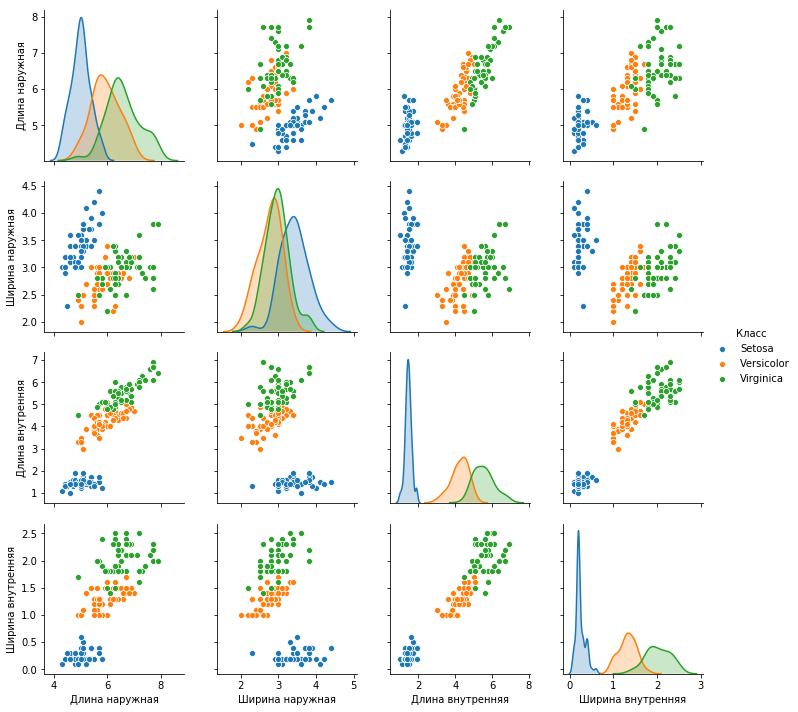

In [4]:
k=sns.pairplot(df, hue='Класс')

In [5]:
class Kmeans:
    def __init__(self):
        self.centroids = np.array([])
        self.index_clusters = np.array([])
         
    def dist(self, a, b):
        return  np.sqrt( np.sum( (a-b)**2, axis=1) ) # сумма по строке
        # а-b, если а матрица, b одномерный массив, тогда разность будет разность по строкам
    def fit(self, data, n_iter=200, k=3):
        #self.centroids = np.array(random.sample(list(data), k)) # получаем координаты центроидов 
        self.centroids = np.array(pd.DataFrame(data).sample(k, random_state=78)) # получаем координаты центроидов 
        
        # допустим data_value (150, 4), тогда centroids = (3, 4)
        for i in range(n_iter): # сколько итераций надо сделать
            distance = [self.dist(data[k], self.centroids) for k in range(len(data)) ] # находим расстояние от каждой точки до каждого кластера
            #distance[0]=array([5.04777179, 3.05777697, 4.41701257]), соответсвенно расстояние до первого кластера второго и третьего
            self.index_clusters = np.argmin(distance, axis=1) # возвращает индекс минимальных элементов по строке 
            self.centroids = [ data[self.index_clusters==c].mean(0) for c in range(k) ]
            # mean(0) # среднее по столбцам в массиве (150, 4)
            # то есть среднее покоординантное, у нас 150 строк, мы их фильтруем по признаку clust==c, где с=0, 1, 2
            # data[clust==0] # выведет все строки, которые относятся к классу 0
    def predict(self, data):
        N=len(data)
        rezult= np.concatenate( (data, self.index_clusters.reshape((N, 1))), axis=1) 
        return rezult
        
        
            
            
            

In [6]:
data_value=np.array(data)


In [7]:
Iskan = Kmeans()
Iskan.fit(data_value, 100, 3)
Pred=Iskan.predict(data_value)

In [8]:
d = {'Setosa' : 2, 'Versicolor' : 0, 'Virginica': 1 }
df['Класс'] = df['Класс'].map(d)
# df = df.replace({'Voice mail plan': d})  альтернатива
df.head()

,Длина наружная,Ширина наружная,Длина внутренняя,Ширина внутренняя,Класс
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [9]:
Y=np.array(df['Класс'])

In [10]:
y_pred = Pred[:, -1].astype(int) # получаем последний столбец
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [11]:
Y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [12]:
np.mean(Y==y_pred)

0.8933333333333333

##### Рассмотрим три измерения

In [13]:
df = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [14]:
data=df.drop(['variety'],axis=1)
data = data.drop(['sepal.width'], axis=1)

d = {'Setosa' : 2, 'Versicolor' : 0, 'Virginica': 1 }
df['variety'] = df['variety'].map(d)
Y = np.array(df['variety'])

data_value = np.array(data)

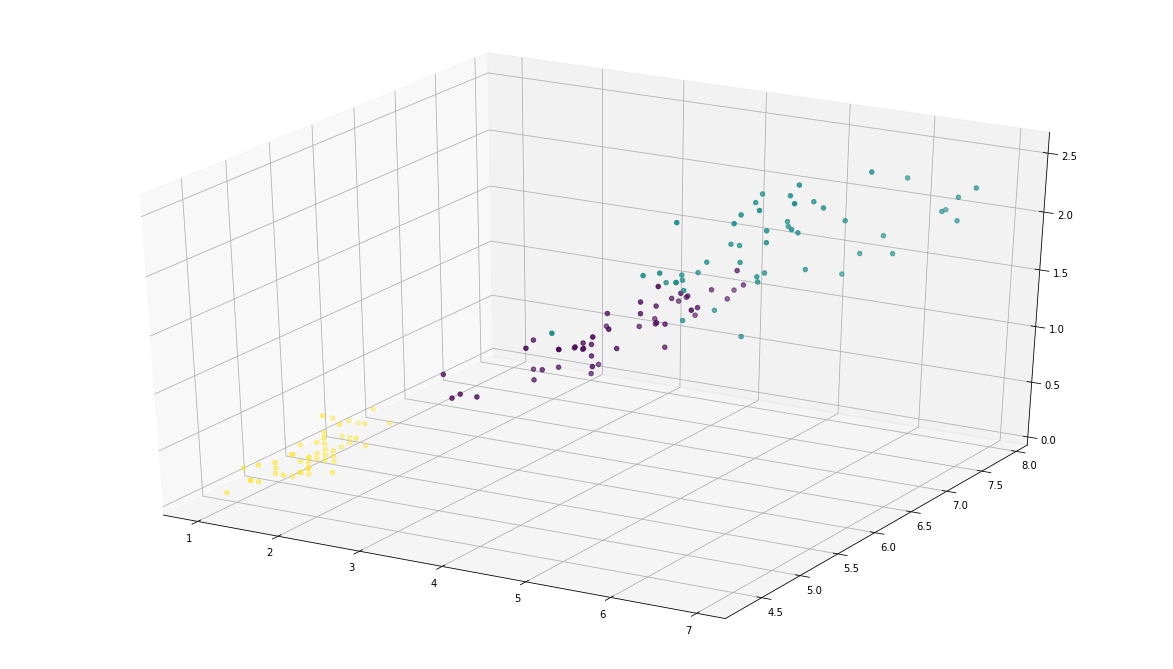

In [15]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_value[:, 1], data_value[:, 0], data_value[:, 2], c=Y);

In [16]:
Iskan3D = Kmeans()
Iskan3D.fit(data_value, 150, 3)
Pred=Iskan3D.predict(data_value)

In [17]:
y_pred = Pred[:, -1].astype(int) # получаем последний столбец
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [18]:
Y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [19]:
np.mean(Y==y_pred)

0.8933333333333333

In [20]:
S=np.array(Iskan3D.centroids) # получаем координаты центроидов

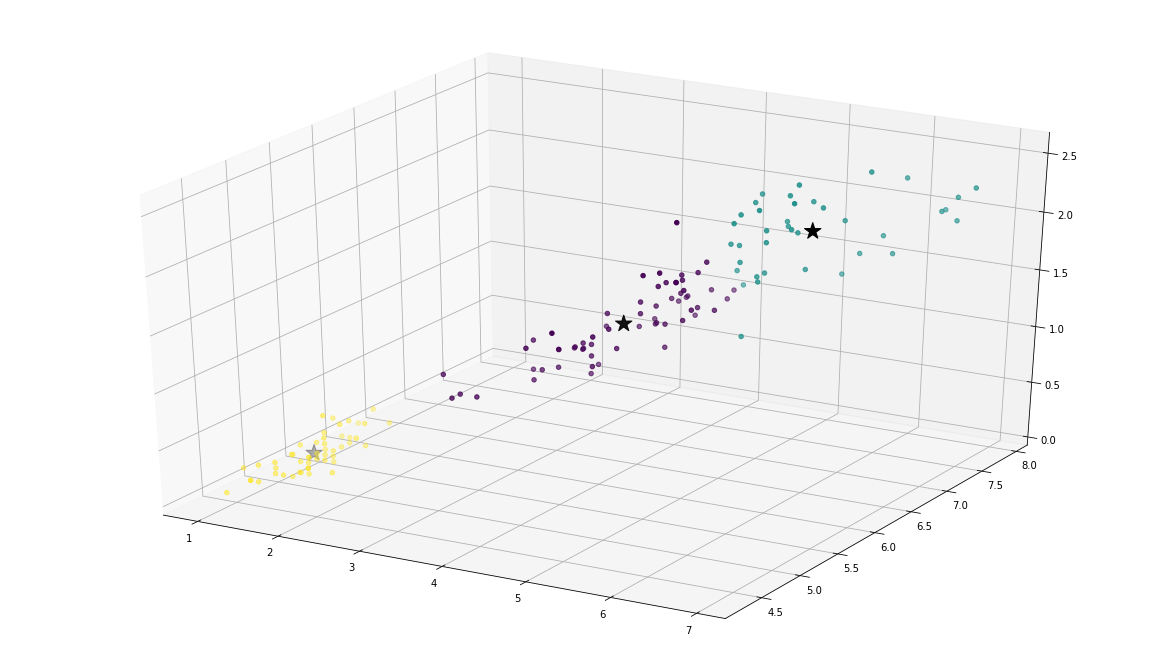

In [21]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_value[:, 1], data_value[:, 0], data_value[:, 2], c=y_pred);
ax.scatter(S[:,1], S[:,0], S[:,2], marker='*', s=300, c='black');

### Другие данные

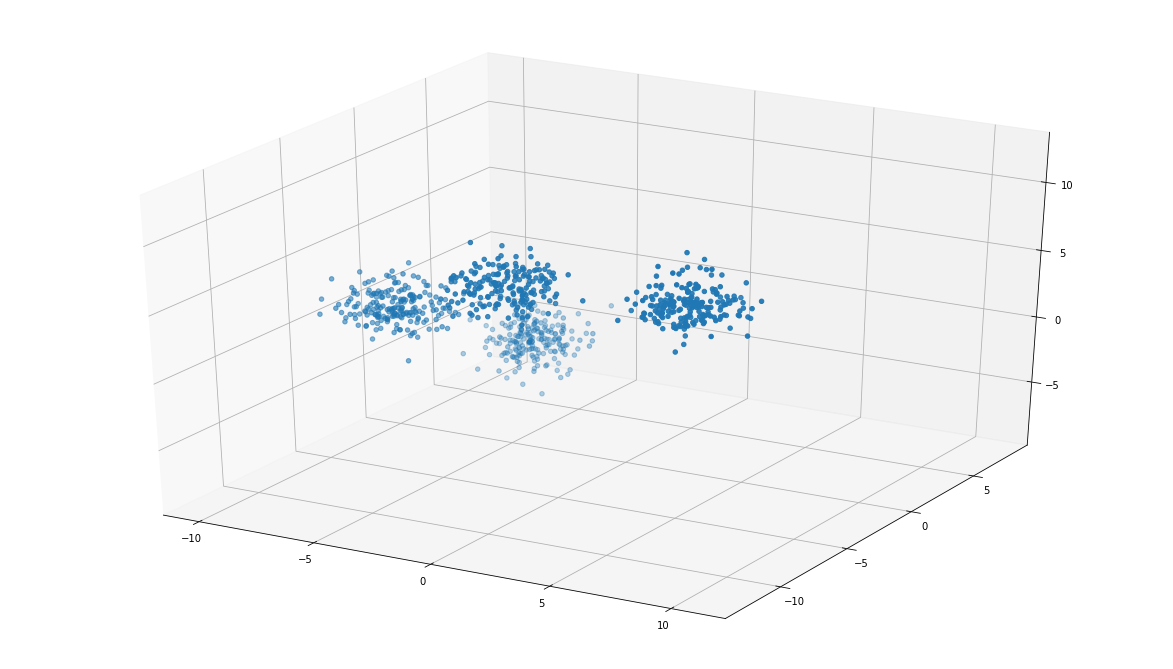

In [22]:
from sklearn.datasets import make_blobs

# # Создание образца набора данных с 4 кластерами
X, y = make_blobs(n_samples=800, n_features=3, centers=4, random_state=12)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2]);

In [23]:
model = Kmeans()
model.fit(X, 150, 4)
pred=model.predict(X)
pred = pred[:, -1].astype(int)
Ss=np.array(model.centroids) # получаем координаты центроидов

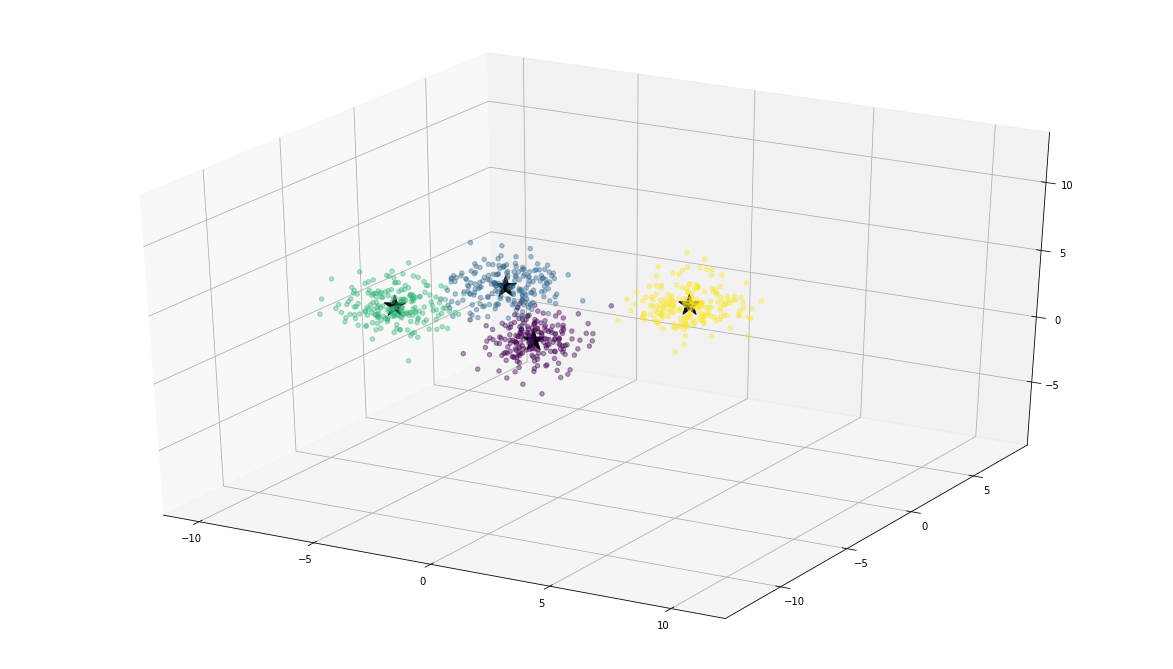

In [24]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=pred, alpha=0.4);
ax.scatter(Ss[:, 0], Ss[:, 1], Ss[:, 2], marker='*', c='#050505', s=500, alpha=1);